### Read and Clean Text 

In [1]:
import nltk
import numpy as np
import pandas as pd

import re
import string

from sklearn.model_selection import train_test_split

In [3]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/dkarl/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
data = pd.read_csv('dataset/SMSSpamCollection.csv', sep='delimiter')
messages = pd.DataFrame(columns=['label','text'])
messages[['label','text']] = data['v1\tv2'].str.split('\t', expand=True)

messages['label'] = np.where(messages['label'] == 'spam', 1, 0)

messages.head()

/home/dkarl/anaconda3/envs/nlp-prep-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

In [10]:
messages['clean_text'] = messages['text'].apply(lambda x: clean_text(x))
messages.head()

,label,text,clean_text
0,0,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goes, usf, lives, around, t..."


### Splitting train and test data 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    messages['clean_text'],
    messages['label'],
    test_size=0.2
)

In [12]:
X_train[:10]

2444    [ltgt, great, loxahatchee, xmas, tree, burning...
1474    [gonna, blakes, night, might, able, get, littl...
2073                                   [wondarfull, song]
5171                                   [im, going, lunch]
2724                 [tunde, wishing, great, day, abiola]
3635    [big, difference, ltgt, versus, ltgt, every, l...
2593    [friend, got, says, hes, upping, order, grams,...
4567    [buy, blackberry, bold, 2, torch, buy, new, us...
4530        [hiya, probably, coming, home, weekend, next]
4193                       [ltgt, w, jetton, ave, forgot]
Name: clean_text, dtype: object

In [13]:
y_train[:10]

2444    0
1474    0
2073    0
5171    0
2724    0
3635    0
2593    0
4567    0
4530    0
4193    0
Name: label, dtype: int64

#### saving each set to a csv file

In [17]:
X_train.to_csv('dataset/X_train.csv', index=False, header=True)
X_test.to_csv('dataset/X_test.csv', index=False, header=True)
y_train.to_csv('dataset/y_train.csv', index=False, header=True)
y_test.to_csv('dataset/y_test.csv', index=False, header=True)

-----------------------------------------------

### TF-IDF Vectors
    - on top of which a RandomForest Classifier can be built

In [18]:
X_train = pd.read_csv('dataset/X_train.csv')
X_test = pd.read_csv('dataset/X_test.csv')
y_train = pd.read_csv('dataset/y_train.csv')
y_test = pd.read_csv('dataset/y_test.csv')

X_train.head()

,clean_text
0,"['ltgt', 'great', 'loxahatchee', 'xmas', 'tree..."
1,"['gonna', 'blakes', 'night', 'might', 'able', ..."
2,"['wondarfull', 'song']"
3,"['im', 'going', 'lunch']"
4,"['tunde', 'wishing', 'great', 'day', 'abiola']"


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train['clean_text'])

X_train_vect = tfidf_vect.transform(X_train['clean_text'])
X_test_vect = tfidf_vect.transform(X_test['clean_text'])

In [21]:
tfidf_vect.vocabulary_

{'ltgt': 4490,
 'great': 3391,
 'loxahatchee': 4477,
 'xmas': 8094,
 'tree': 7429,
 'burning': 1657,
 'update': 7573,
 'totally': 7387,
 'see': 6326,
 'stars': 6807,
 'gonna': 3332,
 'blakes': 1457,
 'night': 5041,
 'might': 4735,
 'able': 833,
 'get': 3258,
 'little': 4379,
 'early': 2633,
 'wondarfull': 7968,
 'song': 6663,
 'im': 3800,
 'going': 3320,
 'lunch': 4504,
 'tunde': 7469,
 'wishing': 7936,
 'day': 2305,
 'abiola': 831,
 'big': 1423,
 'difference': 2442,
 'versus': 7667,
 'every': 2790,
 'hrs': 3709,
 'friend': 3143,
 'got': 3354,
 'says': 6273,
 'hes': 3581,
 'upping': 7582,
 'order': 5280,
 'grams': 3375,
 'buy': 1672,
 'blackberry': 1453,
 'bold': 1502,
 'torch': 7378,
 'new': 5019,
 'used': 7608,
 'let': 4308,
 'know': 4179,
 'plus': 5565,
 'saying': 6272,
 'wifi': 7908,
 'ipad': 3922,
 'hiya': 3615,
 'probably': 5743,
 'coming': 2039,
 'home': 3644,
 'weekend': 7833,
 'next': 5027,
 'jetton': 4020,
 'ave': 1234,
 'forgot': 3080,
 'wish': 7932,
 'hey': 3586,
 'fancy': 

In [22]:
X_test_vect[0]

<1x8210 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [23]:
### converting the sparse vector to an array
X_test_vect[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [24]:
### fitting a random forest on the vectors
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf_model = rf.fit(X_train_vect, y_train.values.ravel())
    # values.ravel converts the pandas column (series) to an object type it can process (array-like)

In [25]:
y_pred = rf_model.predict(X_test_vect)

In [29]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("precision: ",precision, ";recall:",recall, "accuracy:",round((y_pred==y_test['label']).sum()/len(y_pred), 3))

precision:  1.0 ;recall: 0.8417721518987342 accuracy: 0.978


---------------------------------

### word2vec Vectors

In [30]:
import gensim 

/home/dkarl/anaconda3/envs/nlp-prep-env/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [32]:
w2v_model = gensim.models.Word2Vec(
    X_train,
    vector_size=100,
    window=5,
    min_count=2
)

In [34]:
words = set(w2v_model.wv.index_to_key)
X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) 
                        for ls in X_train['clean_text']])

In [35]:
X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) 
                        for ls in X_test['clean_text']])

In [36]:
### creating an element-wise average
X_train_vect_avg = []

for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))
        
        
X_test_vect_avg = []

for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

In [38]:
X_train_vect[0]

array([[-0.00053623,  0.00023643,  0.00510335, ..., -0.00704156,
         0.00090146,  0.00639253],
       [-0.00053623,  0.00023643,  0.00510335, ..., -0.00704156,
         0.00090146,  0.00639253],
       [-0.00861969,  0.00366574,  0.00518988, ..., -0.00239151,
        -0.0095101 ,  0.00450588],
       ...,
       [-0.00861969,  0.00366574,  0.00518988, ..., -0.00239151,
        -0.0095101 ,  0.00450588],
       [-0.00861969,  0.00366574,  0.00518988, ..., -0.00239151,
        -0.0095101 ,  0.00450588],
       [-0.00053623,  0.00023643,  0.00510335, ..., -0.00704156,
         0.00090146,  0.00639253]], dtype=float32)

In [39]:
X_train_vect_avg[0]

array([-4.3402081e-03,  1.8502220e-03,  5.1440713e-03,  7.4717035e-03,
       -1.4112473e-03, -6.6701593e-03,  3.9396919e-03,  7.5961840e-03,
       -3.9917221e-03, -4.8975609e-03,  3.7142802e-03, -4.7501680e-03,
       -5.0370372e-03,  6.8131043e-03, -9.9536055e-04,  2.4388935e-03,
        4.7230111e-03,  4.0689884e-03, -6.1694235e-03, -5.2666953e-03,
        4.9760528e-03,  5.5765238e-04,  7.5252396e-03, -4.2352667e-03,
        6.5455968e-03, -4.3135061e-04, -2.8223696e-03,  5.1236860e-03,
       -4.8006675e-03,  1.0744776e-03,  7.1262108e-04, -2.5452906e-03,
        4.7675502e-03, -6.5551540e-03,  5.7662657e-04,  2.8549024e-04,
        7.5191488e-03, -2.6878231e-04,  4.5126127e-03,  1.8472779e-03,
       -1.3674948e-03, -6.3825905e-04, -8.9460704e-03, -2.4924977e-03,
       -1.4773315e-03,  3.5581691e-03, -1.2613282e-03,  4.3627871e-03,
        3.3486011e-03,  5.7305060e-03, -6.4004079e-04, -2.0952548e-03,
       -2.2869380e-03,  2.0690809e-03,  4.0573976e-03,  1.5820337e-03,
      

#### Fitting random forest classifier on top of word2vec model

In [40]:
rf_model = rf.fit(X_train_vect_avg, y_train.values.ravel())

In [41]:
y_pred = rf_model.predict(X_test_vect_avg)

In [42]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("precision: ",precision, ";recall:",recall, "accuracy:",round((y_pred==y_test['label']).sum()/len(y_pred), 3))

precision:  0.58 ;recall: 0.18354430379746836 accuracy: 0.865


--------------------------------------

### Creating doc2vec Vectors 

In [43]:
tagged_docs_train = [gensim.models.doc2vec.TaggedDocument(v, [i]) 
                     for i,v in enumerate(X_train['clean_text'])]

tagged_docs_test = [gensim.models.doc2vec.TaggedDocument(v, [i]) 
                    for i,v in enumerate(X_test['clean_text'])]

In [44]:
tagged_docs_train[:10]

[TaggedDocument(words="['ltgt', 'great', 'loxahatchee', 'xmas', 'tree', 'burning', 'update', 'totally', 'see', 'stars']", tags=[0]),
 TaggedDocument(words="['gonna', 'blakes', 'night', 'might', 'able', 'get', 'little', 'early']", tags=[1]),
 TaggedDocument(words="['wondarfull', 'song']", tags=[2]),
 TaggedDocument(words="['im', 'going', 'lunch']", tags=[3]),
 TaggedDocument(words="['tunde', 'wishing', 'great', 'day', 'abiola']", tags=[4]),
 TaggedDocument(words="['big', 'difference', 'ltgt', 'versus', 'ltgt', 'every', 'ltgt', 'hrs']", tags=[5]),
 TaggedDocument(words="['friend', 'got', 'says', 'hes', 'upping', 'order', 'grams', 'hes', 'got', 'ltgt', 'get']", tags=[6]),
 TaggedDocument(words="['buy', 'blackberry', 'bold', '2', 'torch', 'buy', 'new', 'used', 'let', 'know', 'plus', 'saying', 'buy', 'ltgt', 'g', 'wifi', 'ipad', 'saying', 'ltgt', 'g']", tags=[7]),
 TaggedDocument(words="['hiya', 'probably', 'coming', 'home', 'weekend', 'next']", tags=[8]),
 TaggedDocument(words="['ltgt', 'w

In [45]:
d2v_model = gensim.models.Doc2Vec(
    tagged_docs_train,
    vector_size = 100,
    window = 5,
    min_count = 2
)

In [47]:
# Infer the vectors to be used in training and testing
    # eval function evaluates a string and converts it to a list
train_vectors = [d2v_model.infer_vector(eval(v.words)) for v in tagged_docs_train]
test_vectors = [d2v_model.infer_vector(eval(v.words)) for v in tagged_docs_test]

#### fitting random forest on top of doc2vec

In [48]:
rf_model = rf.fit(train_vectors, y_train.values.ravel())
y_pred = rf_model.predict(test_vectors)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("precision: ",precision, ";recall:",recall, "accuracy:",round((y_pred==y_test['label']).sum()/len(y_pred), 3))

precision:  0.7 ;recall: 0.17721518987341772 accuracy: 0.873


------------------------------------------------

### Building a classic RNN 

In [59]:
X_train = pd.read_csv('dataset/X_train.csv')
X_test = pd.read_csv('dataset/X_test.csv')
y_train = pd.read_csv('dataset/y_train.csv')
y_test = pd.read_csv('dataset/y_test.csv')



from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['clean_text'])

X_train_seq = tokenizer.texts_to_sequences(X_train['clean_text'])
X_test_seq = tokenizer.texts_to_sequences(X_test['clean_text']) 


In [60]:
X_train_seq_padded = pad_sequences(X_train_seq, 50)
X_test_seq_padded = pad_sequences(X_test_seq, 50)

In [61]:
import keras.backend as K
from keras.layers import Dense,Embedding,LSTM
from keras.models import Sequential

In [62]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [73]:
model = Sequential()

model.add(Embedding(len(tokenizer.index_word)+1, 32))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0))

model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          263712    
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 273,121
Trainable params: 273,121
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy', precision_m, recall_m]
)

In [75]:
print(X_train_seq_padded.shape)
print(X_test_seq_padded.shape)

print(y_train.shape)
print(y_test.shape)

(4459, 50)
(1115, 50)
(4459, 1)
(1115, 1)


In [76]:
history = model.fit(X_train_seq_padded, # training data
                    y_train['label'],   # training target
                    batch_size=32,      # batch size
                    epochs=10,          # the number of epochs
                    validation_data=(X_test_seq_padded, y_test)
                   )

Epoch 1/10
140/140 [==============================] - 56s 352ms/step - loss: 0.4352 - accuracy: 0.8695 - precision_m: 0.1039 - recall_m: 0.0626 - val_loss: 0.0891 - val_accuracy: 0.9785 - val_precision_m: 0.9714 - val_recall_m: 0.8377
Epoch 2/10
140/140 [==============================] - 29s 204ms/step - loss: 0.0569 - accuracy: 0.9827 - precision_m: 0.9410 - recall_m: 0.8759 - val_loss: 0.0546 - val_accuracy: 0.9848 - val_precision_m: 0.9602 - val_recall_m: 0.8954
Epoch 3/10
140/140 [==============================] - 35s 248ms/step - loss: 0.0150 - accuracy: 0.9966 - precision_m: 0.9986 - recall_m: 0.9806 - val_loss: 0.0514 - val_accuracy: 0.9883 - val_precision_m: 0.9423 - val_recall_m: 0.9309
Epoch 4/10
140/140 [==============================] - 47s 338ms/step - loss: 0.0068 - accuracy: 0.9984 - precision_m: 0.9944 - recall_m: 0.9949 - val_loss: 0.0657 - val_accuracy: 0.9865 - val_precision_m: 0.9405 - val_recall_m: 0.9095
Epoch 5/10
140/140 [==============================] - 44s 31

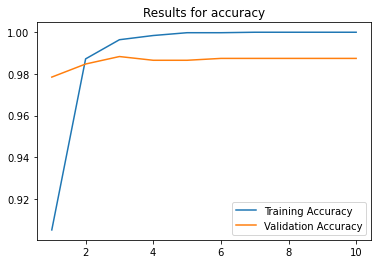

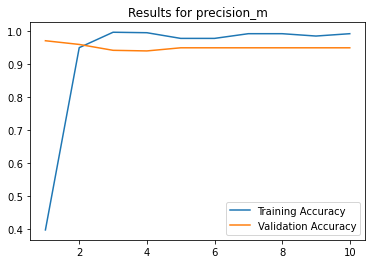

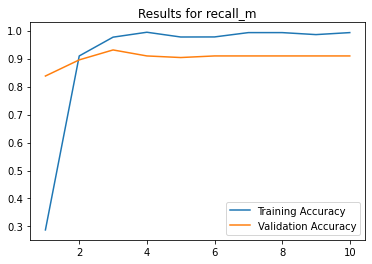

In [77]:
### visualizing the results data ###
import matplotlib.pyplot as plt
%matplotlib inline


for i in ['accuracy', 'precision_m', 'recall_m']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc)+1)
    
    plt.figure()
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    
    plt.title("Results for {}".format(i))
    plt.legend()
    
    plt.show

    
### the plot will show that there is no significant rise in learning rate after epochs 2,3